<a href="https://colab.research.google.com/github/moh53/Graduation-Project-FMS/blob/main/Method_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***load Kaggle breast cancer datase***

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lumayasir","key":"3b1f5beae653ce69d5bd5670138b2b60"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:20<00:00, 208MB/s]
100% 3.10G/3.10G [00:20<00:00, 164MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "breast-histopathology-images.zip"
with ZipFile(file_name, 'r')as zip:
  data= zip.extractall()
  print('Done')

Done


# ***Import Libraries***

In [ ]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tarfile
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import time
#from torchviz import make_dot
#import hiddenlayer as hl

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
import torchvision.models as models

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import json
import glob
import os
import os
import cv2
import glob
import numpy as np
import pandas as pd
import random
import pickle
from tqdm import tqdm
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mlxtend.plotting import plot_confusion_matrix
from scipy import ndimage
import skimage
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit as s_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD , RMSprop, Adam
from keras.layers import Conv2D , SeparableConv2D, BatchNormalization, UpSampling2D, MaxPool2D
from keras.layers import MaxPooling2D, Average, Input, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras import backend as BE
#from vis.visualization import visualize_cam, visualize_cam_with_losses, visualize_activation, visualize_saliency
from vis.utils import utils
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.xception import Xception
from keras.applications.resnet import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.utils.vis_utils import plot_model
#from tensorflow import set_random_seed


# ***LAB & HSV color space***

In [ ]:
#@title Default title text
from PIL import Image
import os, sys
import cv2
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
m=0
j=0
y = []
X = []
path='/content/IDC_regular_ps50_idx5'
for big_folder in listdir(path):
    for folder in listdir(path + '/' + big_folder  ):
      if (folder=='1'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(m<10000):
                m += 1
                
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                if img is not None:
                    clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                    planes = cv2.split(img)
                    for i in range(0,3):
                        planes[i] =clahe.apply(planes[i])
                    img = cv2.merge(planes)
                    #img = clahe.apply(img)
                    img = cv2.GaussianBlur(img,(5,5),0)
                    #img = skimage.transform.resize(img, (299, 299, 3))
                    img = cv2.merge([img,img1,img2,img3,img4,img5,img6])
                    img = np.asarray(img)
        
                X.append(img)
                y.append(1)
            else: break
      if(folder=='0'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(j < 10000):
                j +=1
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                if img is not None:
                  clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                  planes = cv2.split(img)
                  for i in range(0,3):
                      planes[i] =clahe.apply(planes[i])
                  img = cv2.merge(planes)
                  #img = clahe.apply(img)
                  img = cv2.GaussianBlur(img,(5,5),0)
                  #img = skimage.transform.resize(img, (299, 299, 3))
                  img = cv2.merge([img,img1,img2,img3,img4,img5,img6])
                  img = np.asarray(img)
      
                  X.append(img)
                  y.append(0)
            else: break
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
len(y)

20000

In [ ]:
def shuffle_data(X_shu, y_shu):
    #X_shu=np.asarray(X_shu)
    #y_shu=np.asarray(y_shu)
    split = s_split(n_splits= 1, test_size = 0.15, random_state=18)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for train_id, test_id in split.split(X_shu, y_shu):
        X_train.append(X_shu[train_id])
        y_train.append(y_shu[train_id])
        X_test.append(X_shu[test_id])
        y_test.append(y_shu[test_id])
    #del X_shu
    #del y_shu
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = shuffle_data(X,y)
X_train = np.asarray(X_train, dtype = "float32")[0]
X_test = np.asarray(X_test, dtype = "float32")[0]
y_train = np.asarray(y_train)[0]
y_test = np.asarray(y_test)[0]

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils.np_utils import to_categorical

y_test = to_categorical(y_test,2)
y_train = to_categorical(y_train,2)

In [ ]:
X_test.shape


(3000, 100, 100, 9)

In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (4,4)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=strides_, padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_out, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = Conv2D(f_out, kernel_size=k_, strides=strides_, padding = 'SAME')(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
def model_build(in_):
    
    k_=(4,4)
    
    mod_ = Conv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(2, activation="softmax")(mod_)
    
    return mod_

In [ ]:
from keras.layers import MaxPooling2D, Average, Input, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU

in_ = Input((100,100,9))
model = model_build(in_)

In [ ]:
model_f = Model(inputs = in_, outputs = model)

In [ ]:
model_f.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics=["accuracy"])
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 9  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 16  2320        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 100, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
nb_epochs = 100
nb_batch = 64

earlyStopping=EarlyStopping(monitor='val_loss', patience=70, verbose=0, mode='auto')

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=7, verbose=1)

save_path="/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5"

checkpoint = ModelCheckpoint(save_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model_f.fit(X_train, y_train, epochs = nb_epochs, batch_size = nb_batch, callbacks=[earlyStopping, lr_reduce, checkpoint], validation_data=(X_test, y_test), verbose = 2)


Epoch 1/100
266/266 - 22s - loss: 0.3715 - accuracy: 0.8506 - val_loss: 1.0222 - val_accuracy: 0.5267 - lr: 0.0010 - 22s/epoch - 84ms/step
Epoch 2/100
266/266 - 11s - loss: 0.3134 - accuracy: 0.8735 - val_loss: 0.7295 - val_accuracy: 0.5677 - lr: 0.0010 - 11s/epoch - 42ms/step
Epoch 3/100
266/266 - 11s - loss: 0.2952 - accuracy: 0.8799 - val_loss: 1.3813 - val_accuracy: 0.6373 - lr: 0.0010 - 11s/epoch - 42ms/step
Epoch 4/100
266/266 - 11s - loss: 0.2830 - accuracy: 0.8830 - val_loss: 1.4628 - val_accuracy: 0.7403 - lr: 0.0010 - 11s/epoch - 42ms/step
Epoch 5/100
266/266 - 11s - loss: 0.2666 - accuracy: 0.8926 - val_loss: 3.6456 - val_accuracy: 0.5000 - lr: 0.0010 - 11s/epoch - 42ms/step
Epoch 6/100
266/266 - 11s - loss: 0.2534 - accuracy: 0.8969 - val_loss: 2.6239 - val_accuracy: 0.5483 - lr: 0.0010 - 11s/epoch - 42ms/step
Epoch 7/100
266/266 - 11s - loss: 0.2375 - accuracy: 0.9038 - val_loss: 3.7840 - val_accuracy: 0.5217 - lr: 0.0010 - 11s/epoch - 42ms/step
Epoch 8/100
266/266 - 11s -

In [ ]:
with open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_f.evaluate(X_test,y_test,verbose=2)

94/94 - 1s - loss: 0.5050 - accuracy: 0.8997 - 1s/epoch - 13ms/step


[0.5049942135810852, 0.8996666669845581]

**Visualization**




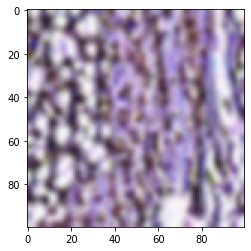

In [ ]:
idx=13
plt.imshow(cv2.merge(cv2.split(X_test[idx])[0:3]))

In [ ]:
y_test_labels = np.argmax(y_test, axis = 1)
y_test_pred_incep = np.argmax(model_f.predict(X_test),axis = 1)
print(precision_score(y_test_labels, y_test_pred_incep))
print(recall_score(y_test_labels, y_test_pred_incep))


0.899400399733511
0.9


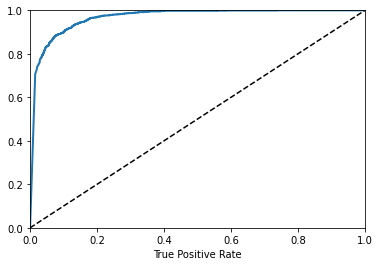

0.9670646666666667

In [ ]:
y_pred_probs = model_f.predict([X_test])
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_probs[:, 1])
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.xlabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_test_labels,y_pred_probs[:,1])

In [ ]:
filename = open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5',"rb")
history = pickle.load(filename)
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


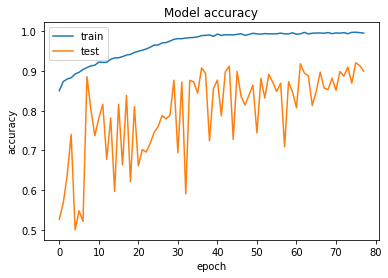

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

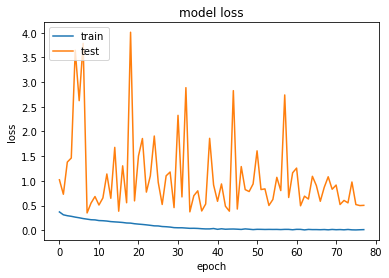

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model_f.predict(X_test)


In [ ]:

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1349  151]
 [ 150 1350]]


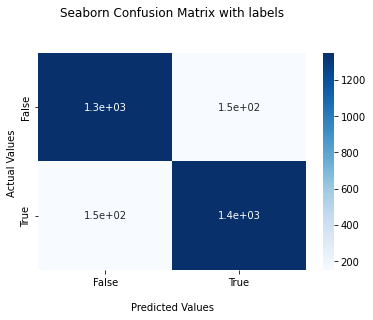

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

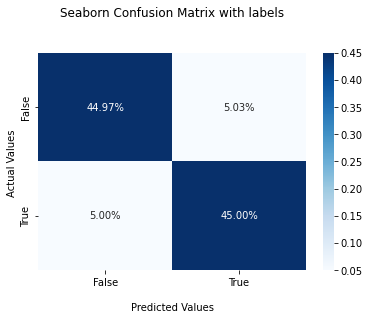

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ***LA & HS color space***

In [ ]:
#@title Default title text
from PIL import Image
import os, sys
import cv2
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
m=0
j=0
y = []
X = []
path='/content/IDC_regular_ps50_idx5'
for big_folder in listdir(path):
    for folder in listdir(path + '/' + big_folder  ):
      if (folder=='1'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(m<10000):
                m += 1
                
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                #img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                #img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                if img is not None:
                    clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                    planes = cv2.split(img)
                    for i in range(0,3):
                        planes[i] =clahe.apply(planes[i])
                    img = cv2.merge(planes)
                    #img = clahe.apply(img)
                    img = cv2.GaussianBlur(img,(5,5),0)
                    #img = skimage.transform.resize(img, (299, 299, 3))
                    img = cv2.merge([img,img1,img2,img3,img4])
                    img = np.asarray(img)
        
                X.append(img)
                y.append(1)
            else: break
      if(folder=='0'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(j < 10000):
                j +=1
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                #img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                #img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                if img is not None:
                  clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                  planes = cv2.split(img)
                  for i in range(0,3):
                      planes[i] =clahe.apply(planes[i])
                  img = cv2.merge(planes)
                  #img = clahe.apply(img)
                  img = cv2.GaussianBlur(img,(5,5),0)
                  #img = skimage.transform.resize(img, (299, 299, 3))
                  img = cv2.merge([img,img1,img2,img3,img4])
                  img = np.asarray(img)
      
                  X.append(img)
                  y.append(0)
            else: break
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
len(y)

20000

In [ ]:
def shuffle_data(X_shu, y_shu):
    #X_shu=np.asarray(X_shu)
    #y_shu=np.asarray(y_shu)
    split = s_split(n_splits= 1, test_size = 0.15, random_state=18)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for train_id, test_id in split.split(X_shu, y_shu):
        X_train.append(X_shu[train_id])
        y_train.append(y_shu[train_id])
        X_test.append(X_shu[test_id])
        y_test.append(y_shu[test_id])
    #del X_shu
    #del y_shu
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = shuffle_data(X,y)
X_train = np.asarray(X_train, dtype = "float32")[0]
X_test = np.asarray(X_test, dtype = "float32")[0]
y_train = np.asarray(y_train)[0]
y_test = np.asarray(y_test)[0]

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils.np_utils import to_categorical

y_test = to_categorical(y_test,2)
y_train = to_categorical(y_train,2)

In [ ]:
X_test.shape


(3000, 100, 100, 7)

In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (4,4)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=strides_, padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_out, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = Conv2D(f_out, kernel_size=k_, strides=strides_, padding = 'SAME')(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
def model_build(in_):
    
    k_=(4,4)
    
    mod_ = Conv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(2, activation="softmax")(mod_)
    
    return mod_

In [ ]:
from keras.layers import MaxPooling2D, Average, Input, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU

in_ = Input((100,100,7))
model = model_build(in_)

In [ ]:
model_f = Model(inputs = in_, outputs = model)

In [ ]:
model_f.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics=["accuracy"])
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 7  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 16  1808        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 100, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
nb_epochs = 100
nb_batch = 64

earlyStopping=EarlyStopping(monitor='val_loss', patience=70, verbose=0, mode='auto')

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=7, verbose=1)

save_path="/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5"

checkpoint = ModelCheckpoint(save_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model_f.fit(X_train, y_train, epochs = nb_epochs, batch_size = nb_batch, callbacks=[earlyStopping, lr_reduce, checkpoint], validation_data=(X_test, y_test), verbose = 2)


Epoch 1/100
266/266 - 20s - loss: 0.3778 - accuracy: 0.8412 - val_loss: 1.0824 - val_accuracy: 0.5813 - lr: 0.0010 - 20s/epoch - 76ms/step
Epoch 2/100
266/266 - 11s - loss: 0.3149 - accuracy: 0.8742 - val_loss: 2.7430 - val_accuracy: 0.5030 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 3/100
266/266 - 11s - loss: 0.2937 - accuracy: 0.8813 - val_loss: 0.5840 - val_accuracy: 0.8383 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 4/100
266/266 - 11s - loss: 0.2741 - accuracy: 0.8879 - val_loss: 0.5469 - val_accuracy: 0.6937 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 5/100
266/266 - 11s - loss: 0.2578 - accuracy: 0.8942 - val_loss: 0.3137 - val_accuracy: 0.8730 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 6/100
266/266 - 11s - loss: 0.2490 - accuracy: 0.8975 - val_loss: 1.7941 - val_accuracy: 0.5833 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 7/100
266/266 - 11s - loss: 0.2414 - accuracy: 0.9022 - val_loss: 0.4134 - val_accuracy: 0.8327 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 8/100
266/266 - 11s -

In [ ]:
with open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_f.evaluate(X_test,y_test,verbose=2)

94/94 - 1s - loss: 2.1042 - accuracy: 0.7340 - 1s/epoch - 12ms/step


[2.1041793823242188, 0.734000027179718]

In [ ]:
y_test_labels = np.argmax(y_test, axis = 1)
y_test_pred_incep = np.argmax(model_f.predict(X_test),axis = 1)
print(precision_score(y_test_labels, y_test_pred_incep))
print(recall_score(y_test_labels, y_test_pred_incep))


0.8790496760259179
0.5426666666666666


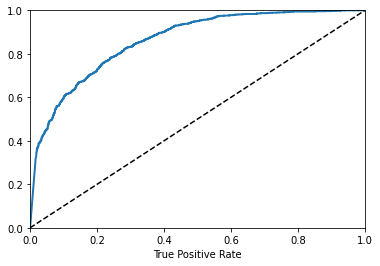

0.8612884444444444

In [ ]:
y_pred_probs = model_f.predict([X_test])
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_probs[:, 1])
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.xlabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_test_labels,y_pred_probs[:,1])

In [ ]:
filename = open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5',"rb")
history = pickle.load(filename)
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


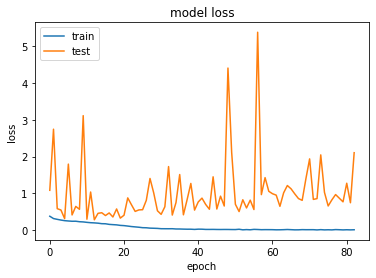

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model_f.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1388  112]
 [ 686  814]]


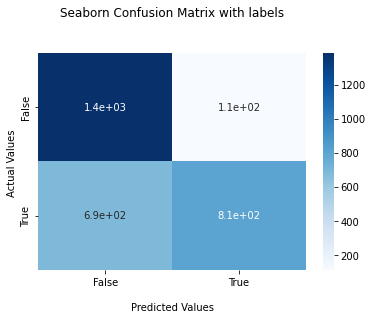

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

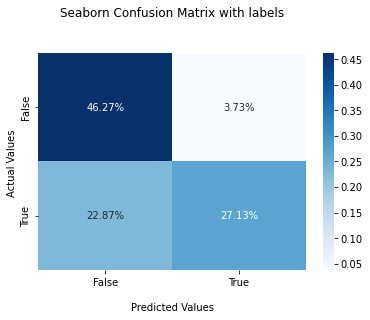

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ***LB & HV***

In [ ]:
#@title Default title text
from PIL import Image
import os, sys
import cv2
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
m=0
j=0
y = []
X = []
path='/content/IDC_regular_ps50_idx5'
for big_folder in listdir(path):
    for folder in listdir(path + '/' + big_folder  ):
      if (folder=='1'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(m<10000):
                m += 1
                
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                #img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                #img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                if img is not None:
                    clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                    planes = cv2.split(img)
                    for i in range(0,3):
                        planes[i] =clahe.apply(planes[i])
                    img = cv2.merge(planes)
                    #img = clahe.apply(img)
                    img = cv2.GaussianBlur(img,(5,5),0)
                    #img = skimage.transform.resize(img, (299, 299, 3))
                    img = cv2.merge([img,img1,img2,img5,img6])
                    img = np.asarray(img)
        
                X.append(img)
                y.append(1)
            else: break
      if(folder=='0'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(j < 10000):
                j +=1
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                #img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                #img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                if img is not None:
                  clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                  planes = cv2.split(img)
                  for i in range(0,3):
                      planes[i] =clahe.apply(planes[i])
                  img = cv2.merge(planes)
                  #img = clahe.apply(img)
                  img = cv2.GaussianBlur(img,(5,5),0)
                  #img = skimage.transform.resize(img, (299, 299, 3))
                  img = cv2.merge([img,img1,img2,img5,img6])
                  img = np.asarray(img)
      
                  X.append(img)
                  y.append(0)
            else: break
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
def shuffle_data(X_shu, y_shu):
    #X_shu=np.asarray(X_shu)
    #y_shu=np.asarray(y_shu)
    split = s_split(n_splits= 1, test_size = 0.15, random_state=18)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for train_id, test_id in split.split(X_shu, y_shu):
        X_train.append(X_shu[train_id])
        y_train.append(y_shu[train_id])
        X_test.append(X_shu[test_id])
        y_test.append(y_shu[test_id])
    #del X_shu
    #del y_shu
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = shuffle_data(X,y)
X_train = np.asarray(X_train, dtype = "float32")[0]
X_test = np.asarray(X_test, dtype = "float32")[0]
y_train = np.asarray(y_train)[0]
y_test = np.asarray(y_test)[0]

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils.np_utils import to_categorical

y_test = to_categorical(y_test,2)
y_train = to_categorical(y_train,2)

In [ ]:
X_test.shape


(3000, 100, 100, 7)

In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (4,4)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=strides_, padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_out, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = Conv2D(f_out, kernel_size=k_, strides=strides_, padding = 'SAME')(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
def model_build(in_):
    
    k_=(4,4)
    
    mod_ = Conv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(2, activation="softmax")(mod_)
    
    return mod_

In [ ]:
from keras.layers import MaxPooling2D, Average, Input, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU

in_ = Input((100,100,7))
model = model_build(in_)

In [ ]:
model_f = Model(inputs = in_, outputs = model)

In [ ]:
model_f.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics=["accuracy"])
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 7  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 16  1808        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 100, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
nb_epochs = 100
nb_batch = 64

earlyStopping=EarlyStopping(monitor='val_loss', patience=70, verbose=0, mode='auto')

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=7, verbose=1)

save_path="/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5"

checkpoint = ModelCheckpoint(save_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model_f.fit(X_train, y_train, epochs = nb_epochs, batch_size = nb_batch, callbacks=[earlyStopping, lr_reduce, checkpoint], validation_data=(X_test, y_test), verbose = 2)


Epoch 1/100
266/266 - 23s - loss: 0.3702 - accuracy: 0.8458 - val_loss: 2.0583 - val_accuracy: 0.5010 - lr: 0.0010 - 23s/epoch - 88ms/step
Epoch 2/100
266/266 - 11s - loss: 0.3277 - accuracy: 0.8674 - val_loss: 3.3510 - val_accuracy: 0.5310 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 3/100
266/266 - 11s - loss: 0.3051 - accuracy: 0.8765 - val_loss: 1.3596 - val_accuracy: 0.5073 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 4/100
266/266 - 11s - loss: 0.2817 - accuracy: 0.8836 - val_loss: 0.9850 - val_accuracy: 0.7357 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 5/100
266/266 - 11s - loss: 0.2636 - accuracy: 0.8931 - val_loss: 1.6381 - val_accuracy: 0.6107 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 6/100
266/266 - 11s - loss: 0.2565 - accuracy: 0.8962 - val_loss: 0.7285 - val_accuracy: 0.7130 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 7/100
266/266 - 11s - loss: 0.2486 - accuracy: 0.8997 - val_loss: 0.7846 - val_accuracy: 0.7200 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 8/100
266/266 - 11s -

In [ ]:
with open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_f.evaluate(X_test,y_test,verbose=2)

94/94 - 1s - loss: 0.7763 - accuracy: 0.8977 - 996ms/epoch - 11ms/step


[0.7763378620147705, 0.8976666927337646]

In [ ]:
y_test_labels = np.argmax(y_test, axis = 1)
y_test_pred_incep = np.argmax(model_f.predict(X_test),axis = 1)
print(precision_score(y_test_labels, y_test_pred_incep))
print(recall_score(y_test_labels, y_test_pred_incep))


0.8865845755022683
0.912


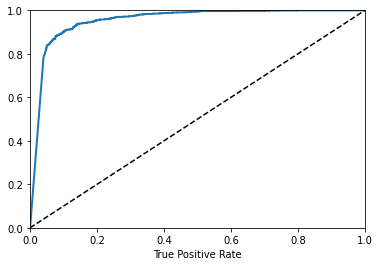

0.9536295555555556

In [ ]:
y_pred_probs = model_f.predict([X_test])
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_probs[:, 1])
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.xlabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_test_labels,y_pred_probs[:,1])

In [ ]:
filename = open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5',"rb")
history = pickle.load(filename)
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


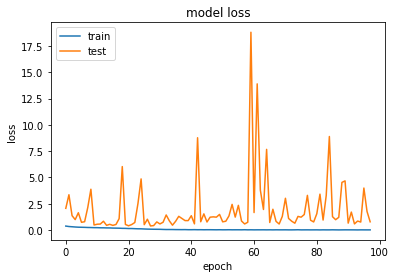

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

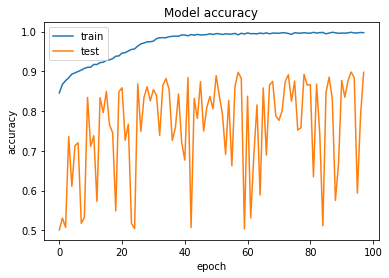

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model_f.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1325  175]
 [ 132 1368]]


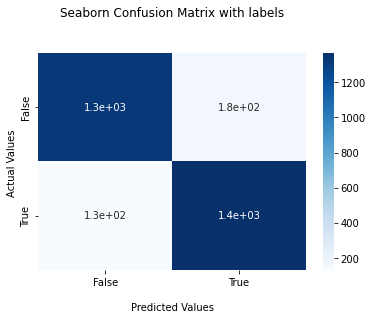

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

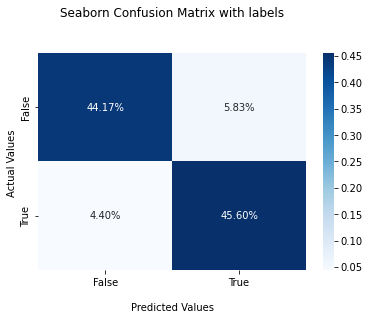

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ***AB & SV color space ***

In [ ]:
#@title Default title text
from PIL import Image
import os, sys
import cv2
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
m=0
j=0
y = []
X = []
path='/content/IDC_regular_ps50_idx5'
for big_folder in listdir(path):
    for folder in listdir(path + '/' + big_folder  ):
      if (folder=='1'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(m<10000):
                m += 1
                
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                #img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                #img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                if img is not None:
                    clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                    planes = cv2.split(img)
                    for i in range(0,3):
                        planes[i] =clahe.apply(planes[i])
                    img = cv2.merge(planes)
                    #img = clahe.apply(img)
                    img = cv2.GaussianBlur(img,(5,5),0)
                    #img = skimage.transform.resize(img, (299, 299, 3))
                    img = cv2.merge([img,img5,img6,img3,img4])
                    img = np.asarray(img)
        
                X.append(img)
                y.append(1)
            else: break
      if(folder=='0'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(j < 10000):
                j +=1
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                #img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                #img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                if img is not None:
                  clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                  planes = cv2.split(img)
                  for i in range(0,3):
                      planes[i] =clahe.apply(planes[i])
                  img = cv2.merge(planes)
                  #img = clahe.apply(img)
                  img = cv2.GaussianBlur(img,(5,5),0)
                  #img = skimage.transform.resize(img, (299, 299, 3))
                  img = cv2.merge([img,img5,img6,img3,img4])
                  img = np.asarray(img)
      
                  X.append(img)
                  y.append(0)
            else: break
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
def shuffle_data(X_shu, y_shu):
    #X_shu=np.asarray(X_shu)
    #y_shu=np.asarray(y_shu)
    split = s_split(n_splits= 1, test_size = 0.15, random_state=18)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for train_id, test_id in split.split(X_shu, y_shu):
        X_train.append(X_shu[train_id])
        y_train.append(y_shu[train_id])
        X_test.append(X_shu[test_id])
        y_test.append(y_shu[test_id])
    #del X_shu
    #del y_shu
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = shuffle_data(X,y)
X_train = np.asarray(X_train, dtype = "float32")[0]
X_test = np.asarray(X_test, dtype = "float32")[0]
y_train = np.asarray(y_train)[0]
y_test = np.asarray(y_test)[0]

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils.np_utils import to_categorical

y_test = to_categorical(y_test,2)
y_train = to_categorical(y_train,2)

In [ ]:
X_test.shape


(3000, 100, 100, 7)

In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (4,4)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=strides_, padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_out, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = Conv2D(f_out, kernel_size=k_, strides=strides_, padding = 'SAME')(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
def model_build(in_):
    
    k_=(4,4)
    
    mod_ = Conv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(2, activation="softmax")(mod_)
    
    return mod_

In [ ]:
from keras.layers import MaxPooling2D, Average, Input, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU

in_ = Input((100,100,7))
model = model_build(in_)

In [ ]:
model_f = Model(inputs = in_, outputs = model)

In [ ]:
model_f.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics=["accuracy"])
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 7  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 16  1808        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 100, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
nb_epochs = 100
nb_batch = 64

earlyStopping=EarlyStopping(monitor='val_loss', patience=70, verbose=0, mode='auto')

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=7, verbose=1)

save_path="/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5"

checkpoint = ModelCheckpoint(save_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model_f.fit(X_train, y_train, epochs = nb_epochs, batch_size = nb_batch, callbacks=[earlyStopping, lr_reduce, checkpoint], validation_data=(X_test, y_test), verbose = 2)


Epoch 1/100
266/266 - 23s - loss: 0.3715 - accuracy: 0.8508 - val_loss: 0.5133 - val_accuracy: 0.7803 - lr: 0.0010 - 23s/epoch - 87ms/step
Epoch 2/100
266/266 - 11s - loss: 0.3119 - accuracy: 0.8730 - val_loss: 0.4070 - val_accuracy: 0.8327 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 3/100
266/266 - 11s - loss: 0.2895 - accuracy: 0.8839 - val_loss: 0.7027 - val_accuracy: 0.7773 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 4/100
266/266 - 11s - loss: 0.2717 - accuracy: 0.8909 - val_loss: 0.5802 - val_accuracy: 0.7973 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 5/100
266/266 - 11s - loss: 0.2581 - accuracy: 0.8946 - val_loss: 1.0373 - val_accuracy: 0.7017 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 6/100
266/266 - 11s - loss: 0.2481 - accuracy: 0.8995 - val_loss: 1.5948 - val_accuracy: 0.5587 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 7/100
266/266 - 11s - loss: 0.2422 - accuracy: 0.9039 - val_loss: 5.7635 - val_accuracy: 0.4480 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 8/100
266/266 - 11s -

In [ ]:
with open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_f.evaluate(X_test,y_test,verbose=2)

94/94 - 1s - loss: 0.7248 - accuracy: 0.8940 - 1s/epoch - 11ms/step


[0.7248052358627319, 0.8939999938011169]

In [ ]:
y_test_labels = np.argmax(y_test, axis = 1)
y_test_pred_incep = np.argmax(model_f.predict(X_test),axis = 1)
print(precision_score(y_test_labels, y_test_pred_incep))
print(recall_score(y_test_labels, y_test_pred_incep))


0.9221428571428572
0.8606666666666667


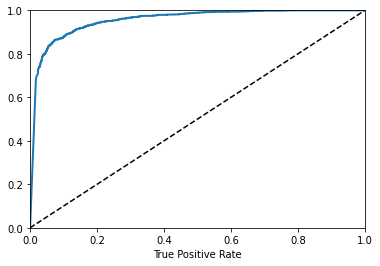

0.9551102222222222

In [ ]:
y_pred_probs = model_f.predict([X_test])
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_probs[:, 1])
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.xlabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_test_labels,y_pred_probs[:,1])

In [ ]:
filename = open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5',"rb")
history = pickle.load(filename)
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


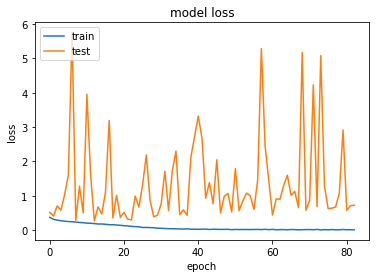

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

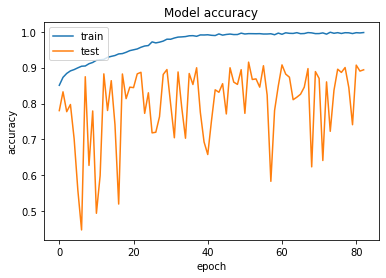

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model_f.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1391  109]
 [ 209 1291]]


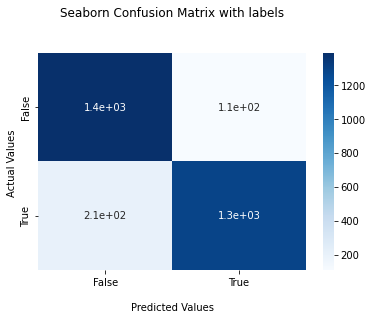

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

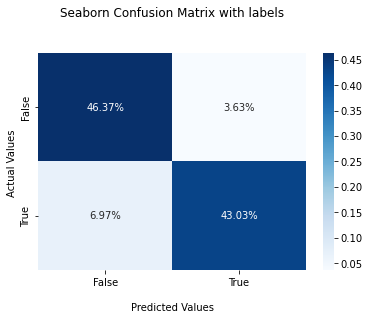

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# ***RGB color space ***

In [ ]:
#@title Default title text
from PIL import Image
import os, sys
import cv2
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
m=0
j=0
y = []
X = []
path='/content/IDC_regular_ps50_idx5'
for big_folder in listdir(path):
    for folder in listdir(path + '/' + big_folder  ):
      if (folder=='1'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(m<10000):
                m += 1
                
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
               # img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                #img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                #img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                #img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                #img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                #img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                if img is not None:
                    clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                    planes = cv2.split(img)
                    for i in range(0,3):
                        planes[i] =clahe.apply(planes[i])
                    img = cv2.merge(planes)
                    #img = clahe.apply(img)
                    img = cv2.GaussianBlur(img,(5,5),0)
                    #img = skimage.transform.resize(img, (299, 299, 3))
                    img = cv2.merge([img])
                    img = np.asarray(img)
        
                X.append(img)
                y.append(1)
            else: break
      if(folder=='0'):
        for filename in listdir(path + '/' + big_folder + '/' + folder):
            if(j < 10000):
                j +=1
                img = cv2.imread(path + '/' + big_folder + '/' + folder + '/' + filename)
                img = cv2.resize(img,(100,100))
                #img1 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[0]
                #img2 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[0]
                #img3 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[1]
                #img4 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[1]
                #img5 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
                #img6 = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[2]
                if img is not None:
                  clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(16,16))
                  planes = cv2.split(img)
                  for i in range(0,3):
                      planes[i] =clahe.apply(planes[i])
                  img = cv2.merge(planes)
                  #img = clahe.apply(img)
                  img = cv2.GaussianBlur(img,(5,5),0)
                  #img = skimage.transform.resize(img, (299, 299, 3))
                  img = cv2.merge([img])
                  img = np.asarray(img)
      
                  X.append(img)
                  y.append(0)
            else: break
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
def shuffle_data(X_shu, y_shu):
    #X_shu=np.asarray(X_shu)
    #y_shu=np.asarray(y_shu)
    split = s_split(n_splits= 1, test_size = 0.15, random_state=18)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for train_id, test_id in split.split(X_shu, y_shu):
        X_train.append(X_shu[train_id])
        y_train.append(y_shu[train_id])
        X_test.append(X_shu[test_id])
        y_test.append(y_shu[test_id])
    #del X_shu
    #del y_shu
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = shuffle_data(X,y)
X_train = np.asarray(X_train, dtype = "float32")[0]
X_test = np.asarray(X_test, dtype = "float32")[0]
y_train = np.asarray(y_train)[0]
y_test = np.asarray(y_test)[0]

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils.np_utils import to_categorical

y_test = to_categorical(y_test,2)
y_train = to_categorical(y_train,2)

In [ ]:
X_test.shape


(3000, 100, 100, 3)

In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (4,4)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_in, kernel_size=k_, strides=strides_, padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = Conv2D(f_out, kernel_size=k_, strides=(1,1), padding = 'SAME')(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = Conv2D(f_out, kernel_size=k_, strides=strides_, padding = 'SAME')(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
def model_build(in_):
    
    k_=(4,4)
    
    mod_ = Conv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(2, activation="softmax")(mod_)
    
    return mod_

In [ ]:
from keras.layers import MaxPooling2D, Average, Input, Concatenate, LeakyReLU, Add, ELU, PReLU, ReLU

in_ = Input((100,100,3))
model = model_build(in_)

In [ ]:
model_f = Model(inputs = in_, outputs = model)

In [ ]:
model_f.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics=["accuracy"])
model_f.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 100, 100, 16  784         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_17 (BatchN  (None, 100, 100, 16  64         ['conv2d_17[0][0]']              
 ormalization)                  )                                                           

In [ ]:
nb_epochs = 100
nb_batch = 64

earlyStopping=EarlyStopping(monitor='val_loss', patience=70, verbose=0, mode='auto')

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=7, verbose=1)

save_path="/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5"

checkpoint = ModelCheckpoint(save_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model_f.fit(X_train, y_train, epochs = nb_epochs, batch_size = nb_batch, callbacks=[earlyStopping, lr_reduce, checkpoint], validation_data=(X_test, y_test), verbose = 2)


Epoch 1/100
266/266 - 13s - loss: 0.4009 - accuracy: 0.8366 - val_loss: 0.4557 - val_accuracy: 0.8307 - lr: 0.0010 - 13s/epoch - 48ms/step
Epoch 2/100
266/266 - 9s - loss: 0.3395 - accuracy: 0.8630 - val_loss: 0.3692 - val_accuracy: 0.8220 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 3/100
266/266 - 10s - loss: 0.3104 - accuracy: 0.8731 - val_loss: 4.5955 - val_accuracy: 0.5000 - lr: 0.0010 - 10s/epoch - 36ms/step
Epoch 4/100
266/266 - 10s - loss: 0.2976 - accuracy: 0.8777 - val_loss: 1.0967 - val_accuracy: 0.5343 - lr: 0.0010 - 10s/epoch - 36ms/step
Epoch 5/100
266/266 - 9s - loss: 0.2809 - accuracy: 0.8866 - val_loss: 1.5327 - val_accuracy: 0.5170 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 6/100
266/266 - 9s - loss: 0.2674 - accuracy: 0.8884 - val_loss: 3.1036 - val_accuracy: 0.5403 - lr: 0.0010 - 9s/epoch - 35ms/step
Epoch 7/100
266/266 - 10s - loss: 0.2584 - accuracy: 0.8942 - val_loss: 0.5366 - val_accuracy: 0.7300 - lr: 0.0010 - 10s/epoch - 36ms/step
Epoch 8/100
266/266 - 9s - loss: 

In [ ]:
with open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
model_f.evaluate(X_test,y_test,verbose=2)

94/94 - 1s - loss: 2.2414 - accuracy: 0.7920 - 811ms/epoch - 9ms/step


[2.2413618564605713, 0.7919999957084656]

In [ ]:
y_test_labels = np.argmax(y_test, axis = 1)
y_test_pred_incep = np.argmax(model_f.predict(X_test),axis = 1)
print(precision_score(y_test_labels, y_test_pred_incep))
print(recall_score(y_test_labels, y_test_pred_incep))


0.9244186046511628
0.636


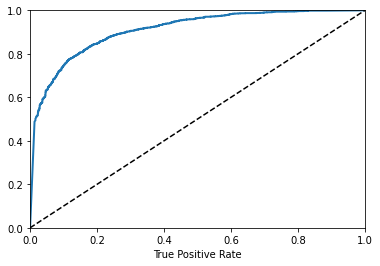

0.9091704444444444

In [ ]:
y_pred_probs = model_f.predict([X_test])
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_probs[:, 1])
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.xlabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_test_labels,y_pred_probs[:,1])

In [ ]:
filename = open('/content/res5_7x7_BGR_l_h_s_a_clahe_20_blur_new_fur_fur_fur_reddata_ELU_acti_convo_test_lastelu.h5',"rb")
history = pickle.load(filename)
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


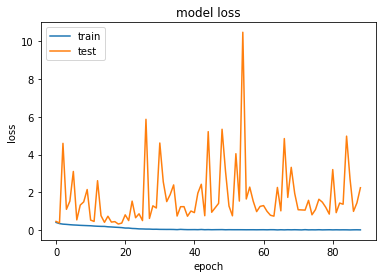

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

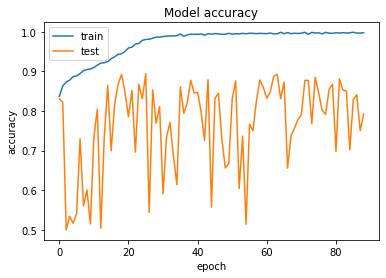

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model_f.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1422   78]
 [ 546  954]]


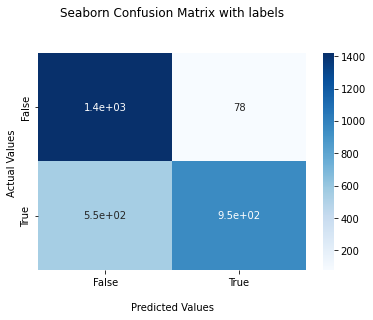

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

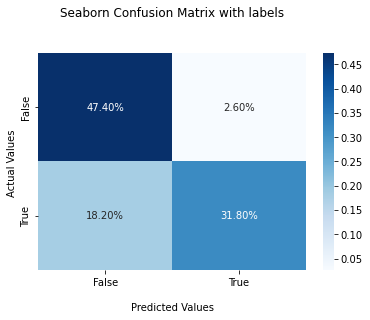

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()